# Introduction 
This Dataset is about Water points around Kenya, with different coordinates, I am interested in the  population living around certain water points and if the increase of the population is inversely correlated to the Decrease of the Groundwater and the recharge of Aquifers. Besides, I am also interested in the sufficiency of the water for future purposes based on the use of the population and sustainability. Also I would like to check if there are alternatives sources to the groundwater sources of water. 

One of the challenges I foresee is that the dataset is too huge, and has a lot of missing values. Which means when cleaning the data it will take me a long time to actually narrow down to the training set. 

Some of my reccomendations include 
* Recommendations of other sources of water if none are available
* Geographical distribution of the water points and how far the population is from the access points. 
* Recommendations of sustainability of the water resources. Either how to recharge Aquifers, or using green roof technologies etc. 
* Predict the water point status, those with high-risks need constant monitoring as compared to low-risks.

Similar case studies have been done on GIS mapping and how to locate the water points and what measures need to be implemented to ensure sufficiency of the water in the near future. 


# Objective
1. Exploratory Data Analysis
2. Preparing the data through handling missing values and 
3. Training and making predictions using a classification model
4. Model evaluation

## 1. Exploratory Analysis

1.1. Importing Libraries

In [50]:
#Include libraries to be used
%matplotlib inline
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
#import pandas_profiling
#mport pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV 
import statsmodels.api as sm
from sklearn.datasets import load_boston
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
from scipy.cluster import hierarchy
from sklearn import decomposition, preprocessing, cluster, tree
from sklearn import cluster, decomposition, pipeline, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.plotting.register_matplotlib_converters()
import statsmodels
import warnings
warnings.filterwarnings("ignore")

# 1.2 Data Cleansing 

1.2.1 Loading Data Set 

In [51]:
df = pd.read_csv('kenya_water_points.csv')

In [52]:
df.head()

,FID,fid,the_geom,Sno_,Latitude,Longitude,Location,Name_of_So,Date_of_en,Village_to,...,DSPOINT_,DSPOINT_ID,DSPTTYPE,DSPTTYPETX,LONG,LAT,DNPOINT_,DNPOINT_ID,DNPTTYPE,DNPTTYPETX
0,kenya_water_points.1,1,POINT (39.28041667 3.421883333),1,3.421883,39.280417,"3.421883333,39.28041667",Watiti diqo pan,28/11/2012 08:24,watiti,...,0,0,0,NaN,0.0,0.0,0,0,0,NaN
1,kenya_water_points.2,2,POINT (39.24551667 3.440416667),2,3.440417,39.245517,"3.440416667,39.24551667",Bashbash pan,29/11/2012 10:57,yaballo,...,0,0,0,NaN,0.0,0.0,0,0,0,NaN
2,kenya_water_points.3,3,POINT (37.98897678 2.33289189),3,2.332892,37.988977,"2.33289189,37.98897678",Malabot,26/11/2012 12:27,Gas,...,0,0,0,NaN,0.0,0.0,0,0,0,NaN
3,kenya_water_points.4,4,POINT (37.00124824 3.26592503),4,3.265925,37.001248,"3.26592503,37.00124824",Guyo yattani,29/11/2012 07:39,El Isacko malla,...,0,0,0,NaN,0.0,0.0,0,0,0,NaN
4,kenya_water_points.5,5,POINT (37.00124824 3.26592503),5,3.265925,37.001248,"3.26592503,37.00124824",Olla Bodicha,29/11/2012 09:28,El Boru magatho,...,0,0,0,NaN,0.0,0.0,0,0,0,NaN


In [53]:
df.head().T

,0,1,2,3,4
FID,kenya_water_points.1,kenya_water_points.2,kenya_water_points.3,kenya_water_points.4,kenya_water_points.5
fid,1,2,3,4,5
the_geom,POINT (39.28041667 3.421883333),POINT (39.24551667 3.440416667),POINT (37.98897678 2.33289189),POINT (37.00124824 3.26592503),POINT (37.00124824 3.26592503)
Sno_,1,2,3,4,5
Latitude,3.421883,3.440417,2.332892,3.265925,3.265925
...,...,...,...,...,...
LAT,0.0,0.0,0.0,0.0,0.0
DNPOINT_,0,0,0,0,0
DNPOINT_ID,0,0,0,0,0
DNPTTYPE,0,0,0,0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Columns: 121 entries, FID to DNPTTYPETX
dtypes: float64(28), int64(61), object(32)
memory usage: 3.0+ MB


In [55]:
df.shape

(3216, 121)

In [56]:
df.describe()

,fid,Sno_,Latitude,Longitude,Year_const,OBJECTID,ID,WF_NAME,WF_TYPE,WF_CODE,...,FLUORID,SAR,DSPOINT_,DSPOINT_ID,DSPTTYPE,LONG,LAT,DNPOINT_,DNPOINT_ID,DNPTTYPE
count,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.0,0.0,0.0,3216.0,...,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000
mean,1608.500000,28.016169,0.415067,4.988673,263.801928,39.334266,0.0,NaN,NaN,0.0,...,0.065504,0.132789,0.461754,0.461754,0.029851,8.321285,-0.178525,64.379975,64.379975,0.225124
std,928.523559,84.533379,1.089195,12.807350,677.804761,854.978026,0.0,NaN,NaN,0.0,...,0.956843,2.687551,4.070502,4.070502,0.234726,15.842540,1.103846,153.236842,153.236842,0.550699
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.591000,0.000000,0.000000,0.000000
25%,804.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1608.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2412.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3216.000000,424.000000,4.338262,39.911217,2012.000000,19403.000000,0.0,NaN,NaN,0.0,...,37.000000,90.000000,54.000000,54.000000,2.000000,41.440000,3.878000,643.000000,643.000000,6.000000


In [57]:
df.columns

Index(['FID', 'fid', 'the_geom', 'Sno_', 'Latitude', 'Longitude', 'Location',
       'Name_of_So', 'Date_of_en', 'Village_to',
       ...
       'DSPOINT_', 'DSPOINT_ID', 'DSPTTYPE', 'DSPTTYPETX', 'LONG', 'LAT',
       'DNPOINT_', 'DNPOINT_ID', 'DNPTTYPE', 'DNPTTYPETX'],
      dtype='object', length=121)

In [58]:
df.nunique()

FID           3216
fid           3216
the_geom      3133
Sno_           425
Latitude       337
              ... 
LAT            649
DNPOINT_       644
DNPOINT_ID     644
DNPTTYPE         5
DNPTTYPETX       4
Length: 121, dtype: int64

In [59]:
df.dtypes

FID            object
fid             int64
the_geom       object
Sno_            int64
Latitude      float64
               ...   
LAT           float64
DNPOINT_        int64
DNPOINT_ID      int64
DNPTTYPE        int64
DNPTTYPETX     object
Length: 121, dtype: object

## 1.3 Data Cleaning and Wrangling 

1.3.1Dealing with missing values

In [60]:
df.isna().any()

FID           False
fid           False
the_geom      False
Sno_          False
Latitude      False
              ...  
LAT           False
DNPOINT_      False
DNPOINT_ID    False
DNPTTYPE      False
DNPTTYPETX     True
Length: 121, dtype: bool

In [61]:
df.drop(['FID','fid', 'Photo', 'ID','WF_NAME', 'WF_TYPE', 'WF_CODE', 'POINT_X', 'POINT_Y', 'F2', 'F3', 'Admin_Id',\
'Admin_Name', 'F6', 'Service_Ty', 'F8', 'Scheme_Sit', 'F10', 'Extraction', 'Int_Diam_', 'Well_Depth', 'Static_WTD',\
'Dynamic_WT', 'Lining_Typ', 'Is_H_Pump', 'H_Pump_Typ', 'Dim__Sprin', 'Storage_Ty', 'Dim__S_Tan', 'Is_Fence', \
'Storage__1', 'Dim_Storag', 'Cons_Year', 'Means_Of_E', 'Raw_Trans_', 'R_T_Length', 'R_T_Pipe_T', 'R_T_P_Diam', \
'Clear_Tran', 'C_T_Length', 'C_T_Pipe_T', 'C_T_P_Leng', 'Service__1', 'F7', 'F9', 'AREA', 'PERIMETER','SPRING',\
'SQUALITY', 'BOREHOLE', 'REMARKS', 'WELLS', 'LENGTH','QUALITY', 'WQUALITY', 'WSNAME', 'EXLOC', 'SDATE', 'DISSOL', 'FE', 'NA',\
'OBJECTID', 'Scheme_Id', 'GPS___X','GPS___Y', 'GPS___Z','MG', 'CA', 'PH', 'ALKALI', 'HARDNESS', 'CHLORIDE','SULFATE', \
'FLUORID', 'SAR','K', 'DSPTTYPETX', 'DSPTTYPE', 'BUILDPD', 'YIELD','REMARKB', 'QUALIBH', 'PANS_DAMS', 'BUILD', 'ELCONDUC', \
'WSTRUCK','WLEVEL', 'DSPOINT_','DSPOINT_ID','CAPACITY','LONG','LAT', 'DNPOINT_', 'DNPTTYPETX', 'DNPTTYPE', 'DNPOINT_ID', 'WIDTH',\
'DEPTH', 'Source_Typ', 'Des_V_PerD', 'Act_V_PerD'], axis='columns', inplace=True)
df

,the_geom,Sno_,Latitude,Longitude,Location,Name_of_So,Date_of_en,Village_to,Year_const,Funded_By,Reliabilit,Type_of_so,Functional,NKWATER_,NKWATER_ID,CODE,IDCODE,NAME,R_CODE,DEPTHBH
0,POINT (39.28041667 3.421883333),1,3.421883,39.280417,"3.421883333,39.28041667",Watiti diqo pan,28/11/2012 08:24,watiti,2011,cbo,Insufficient (> 7 days per month no supply),Dam/pan (runoff harvesting),Non-functional,0,0,0,0,NaN,0,0.0
1,POINT (39.24551667 3.440416667),2,3.440417,39.245517,"3.440416667,39.24551667",Bashbash pan,29/11/2012 10:57,yaballo,2011,CDTF,Insufficient (> 7 days per month no supply),Dam/pan (runoff harvesting),Functional (and in use),0,0,0,0,NaN,0,0.0
2,POINT (37.98897678 2.33289189),3,2.332892,37.988977,"2.33289189,37.98897678",Malabot,26/11/2012 12:27,Gas,1999,Pisp,Good practically always,Unprotected spring,Functional (and in use),0,0,0,0,NaN,0,0.0
3,POINT (37.00124824 3.26592503),4,3.265925,37.001248,"3.26592503,37.00124824",Guyo yattani,29/11/2012 07:39,El Isacko malla,2011,NGOs,Good practically always,NaN,Functional (and in use),0,0,0,0,NaN,0,0.0
4,POINT (37.00124824 3.26592503),5,3.265925,37.001248,"3.26592503,37.00124824",Olla Bodicha,29/11/2012 09:28,El Boru magatho,2003,NGO,Good practically always,NaN,Functional (and in use),0,0,0,0,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,POINT (39.04761969600003 3.52789887900002),0,0.000000,0.000000,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,0.0
3212,POINT (39.04861908600003 3.5278535880000277),0,0.000000,0.000000,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,0.0
3213,POINT (39.05022160800007 3.5258720350000203),0,0.000000,0.000000,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,0.0
3214,POINT (39.05053671300004 3.5255462980000516),0,0.000000,0.000000,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,0.0


1.3.2 Replacing missing values 

In [62]:
df.fillna(0, inplace = True)
df.columns.get_loc('Location')

4

# 1.4 Data Preparation 

In [63]:
df.columns

Index(['the_geom', 'Sno_', 'Latitude', 'Longitude', 'Location', 'Name_of_So',
       'Date_of_en', 'Village_to', 'Year_const', 'Funded_By', 'Reliabilit',
       'Type_of_so', 'Functional', 'NKWATER_', 'NKWATER_ID', 'CODE', 'IDCODE',
       'NAME', 'R_CODE', 'DEPTHBH'],
      dtype='object')

In [64]:
cols = set(df.columns)
cols_numeric = set(['Sno_','Latitude', 'Longitude', 'Location', 'Date_of_en','Year_const'])
cols_categorical = list(cols - cols_numeric)
cols_categorical

['NKWATER_',
 'IDCODE',
 'Funded_By',
 'the_geom',
 'Functional',
 'Reliabilit',
 'CODE',
 'NKWATER_ID',
 'R_CODE',
 'DEPTHBH',
 'Village_to',
 'Name_of_So',
 'Type_of_so',
 'NAME']

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sno_,3216.0,28.016169,84.533379,0.0,0.0,0.0,0.00,424.000000
Latitude,3216.0,0.415067,1.089195,0.0,0.0,0.0,0.00,4.338262
Longitude,3216.0,4.988673,12.807350,0.0,0.0,0.0,0.00,39.911217
Year_const,3216.0,263.801928,677.804761,0.0,0.0,0.0,0.00,2012.000000
NKWATER_,3216.0,695.121580,711.780705,0.0,0.0,494.5,1320.25,2130.000000
NKWATER_ID,3216.0,684.080535,703.729345,0.0,0.0,485.5,1289.25,2129.000000
CODE,3216.0,3.390547,3.900691,0.0,0.0,3.0,4.00,16.000000
IDCODE,3216.0,684.080535,703.729345,0.0,0.0,485.5,1289.25,2129.000000
R_CODE,3216.0,9.090485,12.007575,0.0,0.0,2.0,17.00,35.000000
DEPTHBH,3216.0,3.404042,20.528176,0.0,0.0,0.0,0.00,213.400000


In [66]:
df.head()

,the_geom,Sno_,Latitude,Longitude,Location,Name_of_So,Date_of_en,Village_to,Year_const,Funded_By,Reliabilit,Type_of_so,Functional,NKWATER_,NKWATER_ID,CODE,IDCODE,NAME,R_CODE,DEPTHBH
0,POINT (39.28041667 3.421883333),1,3.421883,39.280417,"3.421883333,39.28041667",Watiti diqo pan,28/11/2012 08:24,watiti,2011,cbo,Insufficient (> 7 days per month no supply),Dam/pan (runoff harvesting),Non-functional,0,0,0,0,0,0,0.0
1,POINT (39.24551667 3.440416667),2,3.440417,39.245517,"3.440416667,39.24551667",Bashbash pan,29/11/2012 10:57,yaballo,2011,CDTF,Insufficient (> 7 days per month no supply),Dam/pan (runoff harvesting),Functional (and in use),0,0,0,0,0,0,0.0
2,POINT (37.98897678 2.33289189),3,2.332892,37.988977,"2.33289189,37.98897678",Malabot,26/11/2012 12:27,Gas,1999,Pisp,Good practically always,Unprotected spring,Functional (and in use),0,0,0,0,0,0,0.0
3,POINT (37.00124824 3.26592503),4,3.265925,37.001248,"3.26592503,37.00124824",Guyo yattani,29/11/2012 07:39,El Isacko malla,2011,NGOs,Good practically always,0,Functional (and in use),0,0,0,0,0,0,0.0
4,POINT (37.00124824 3.26592503),5,3.265925,37.001248,"3.26592503,37.00124824",Olla Bodicha,29/11/2012 09:28,El Boru magatho,2003,NGO,Good practically always,0,Functional (and in use),0,0,0,0,0,0,0.0


# 2. Visualization 

<function matplotlib.pyplot.show(close=None, block=None)>

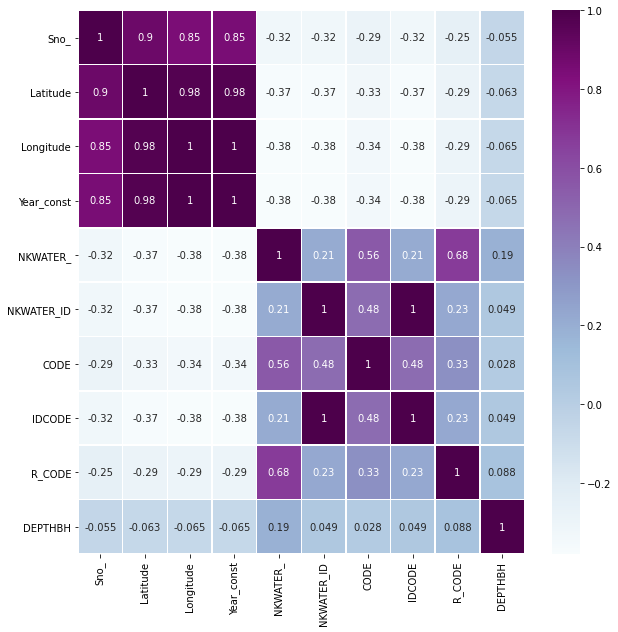

In [67]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df.corr(),cmap='BuPu',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show

<AxesSubplot:ylabel='Frequency'>

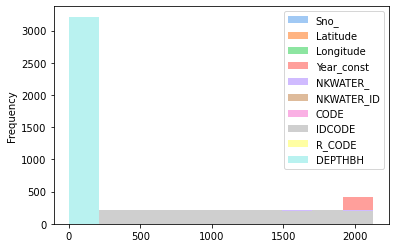

In [68]:
df.plot.hist(['Location'])

The boreholes dug around 18th century were deep and shows that water was found in them, the ones created around 20th century have less water according to the interpretation below. 

<AxesSubplot:>

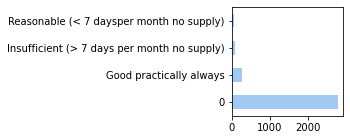

In [69]:
fig, ax = plt.subplots (figsize= (2,2))
df.Reliabilit.value_counts().plot.barh()


Shows that the number of times the wells or boreholes have insufficient supplies is almost all the time which means that most boreholes dug are dry. There are some proably 2% which had water in them but that was before the 20th century. 

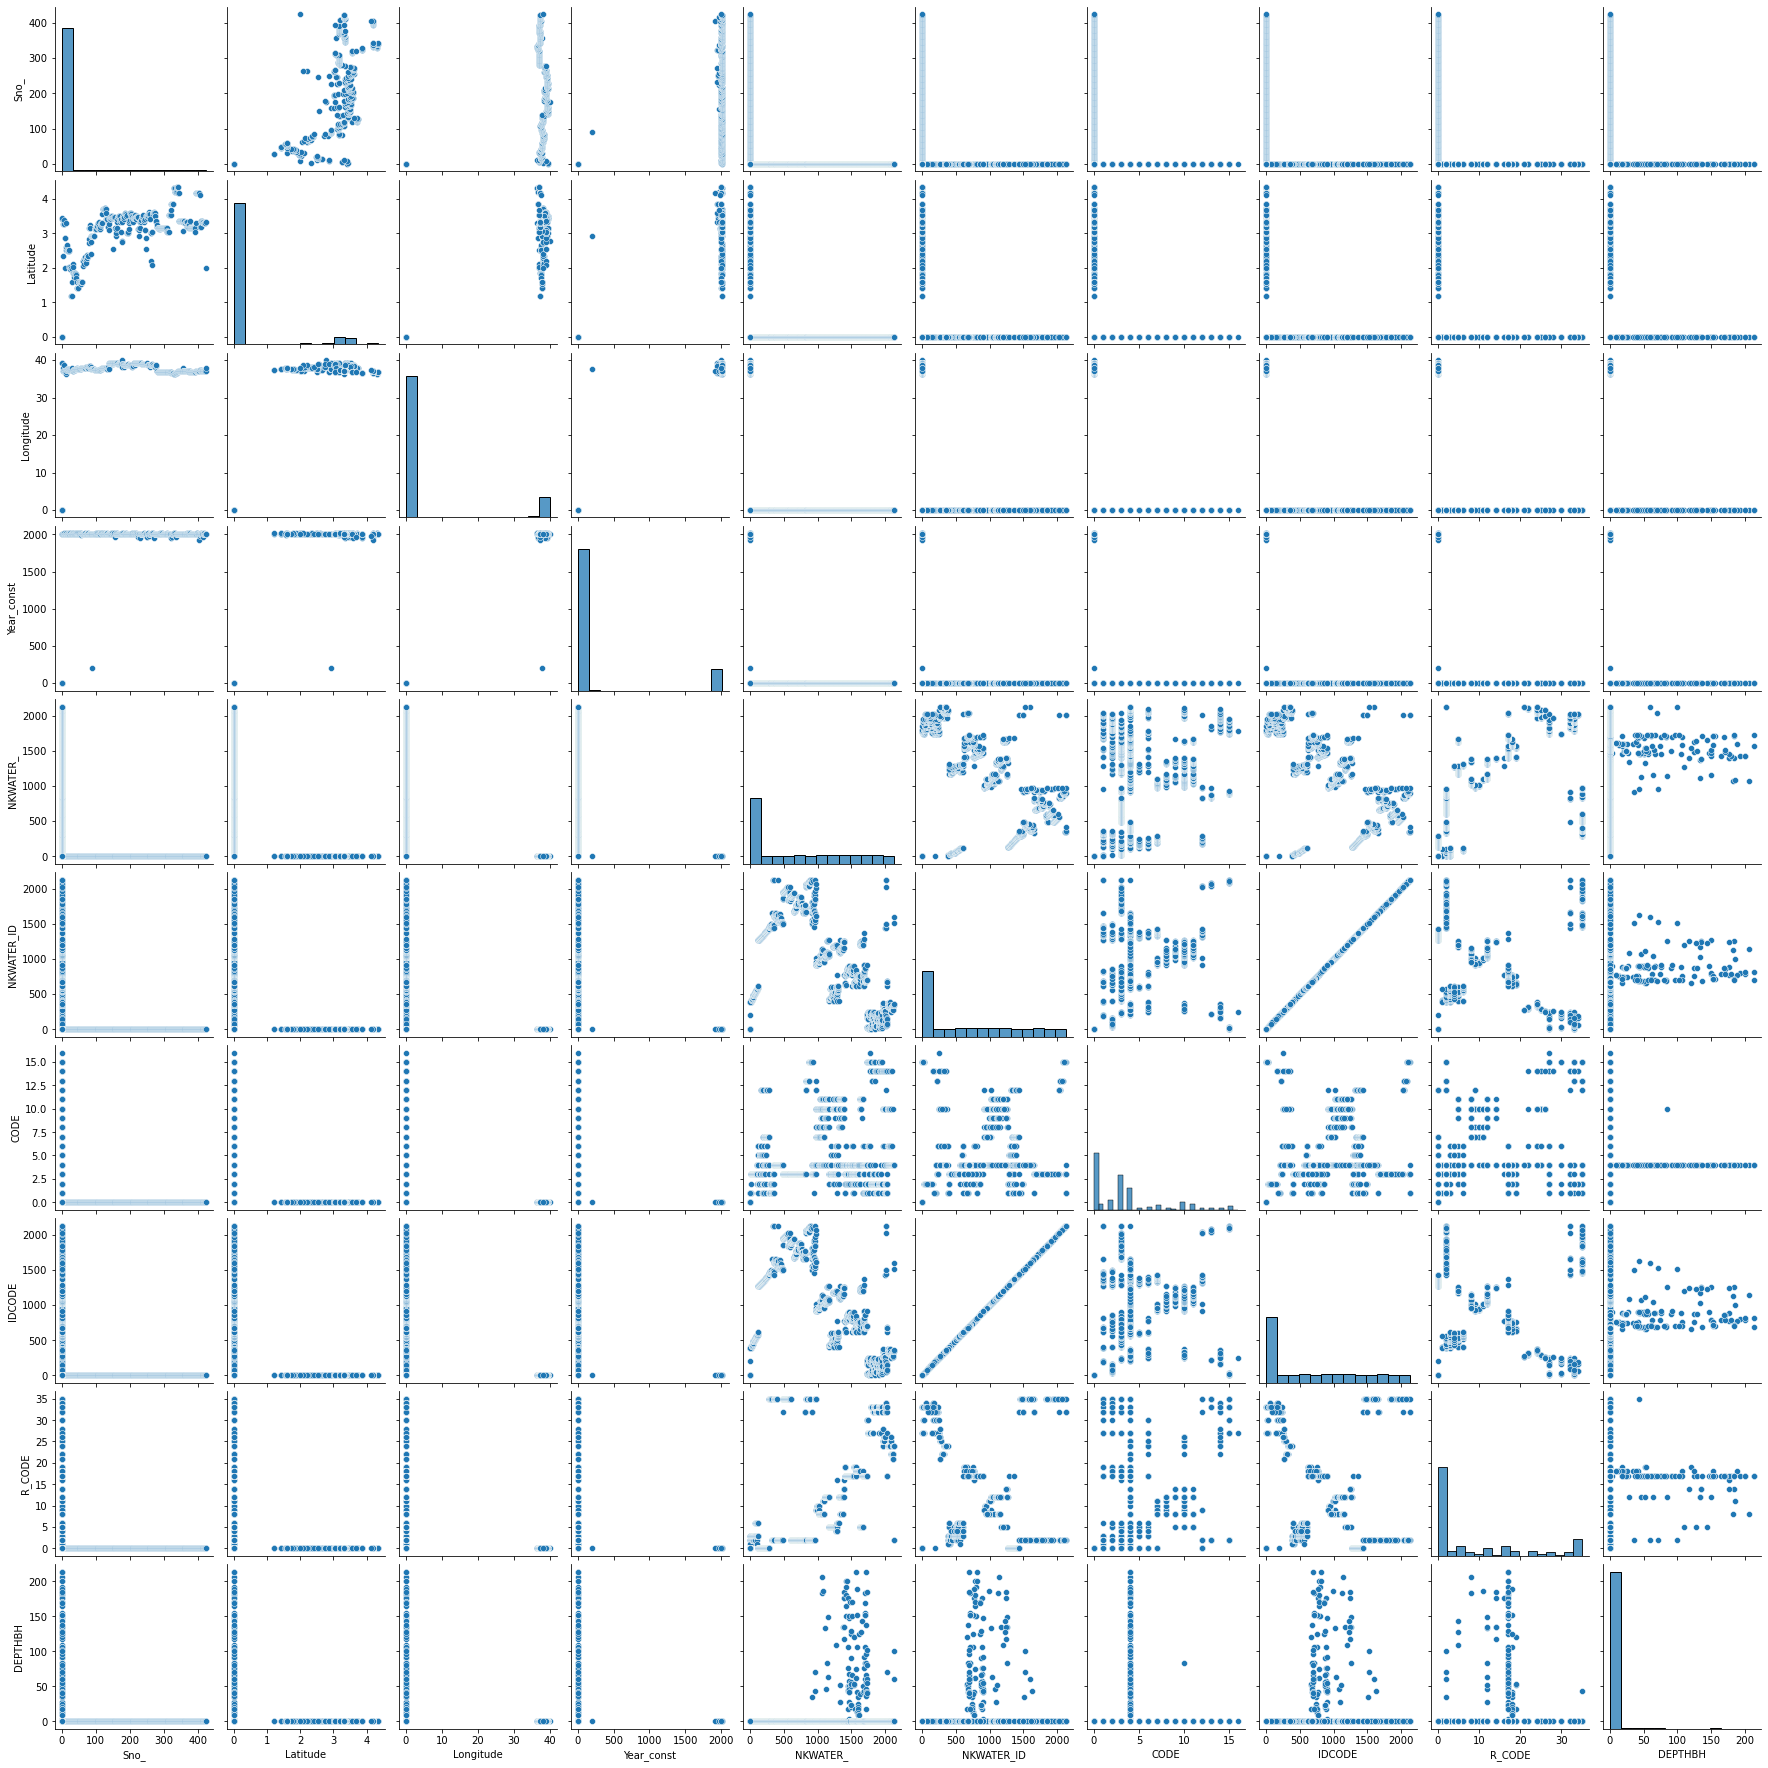

In [ ]:
sns.pairplot(df)

In [ ]:
#Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = df[x].min()
    x_max = df[x].max()
    Q1 = df[x].quantile(0.25)
    Q2 = df[x].quantile(0.50)
    Q3 = df[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
        f'{x.capitalize()}(min) : {x_min}\n'
        f'Q1                    : {Q1}\n'
        f'Q2(Median)            : {Q2}\n'
        f'Q3                    : {Q3}\n'
        f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(df[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = df[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=df[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(df[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

In [ ]:
df.columns

Index(['the_geom', 'Sno_', 'Latitude', 'Longitude', 'Location', 'Name_of_So',
       'Date_of_en', 'Village_to', 'Year_const', 'Funded_By', 'Reliabilit',
       'Type_of_so', 'Functional', 'NKWATER_', 'NKWATER_ID', 'CODE', 'IDCODE',
       'NAME', 'R_CODE', 'DEPTHBH'],
      dtype='object')

In [77]:
cols = set(df.columns)
cols_numeric = set([ 'Latitude','Location','Longitude','IDCODE','Sn0_', 'Date_of_en', 'NKWATER_', 'CODE', 'R_CODE','DEPTHBH','NKWATER_ID','Year_const'])
cols_categorical = list(cols - cols_numeric)
cols_categorical

['Funded_By',
 'the_geom',
 'Functional',
 'Reliabilit',
 'Sno_',
 'Village_to',
 'Name_of_So',
 'Type_of_so',
 'NAME']

5 Point Summary of Year_const Attribute:
Year_const(min) : 0
Q1                    : 0.0
Q2(Median)            : 0.0
Q3                    : 0.0
Year_const(max) : 2012


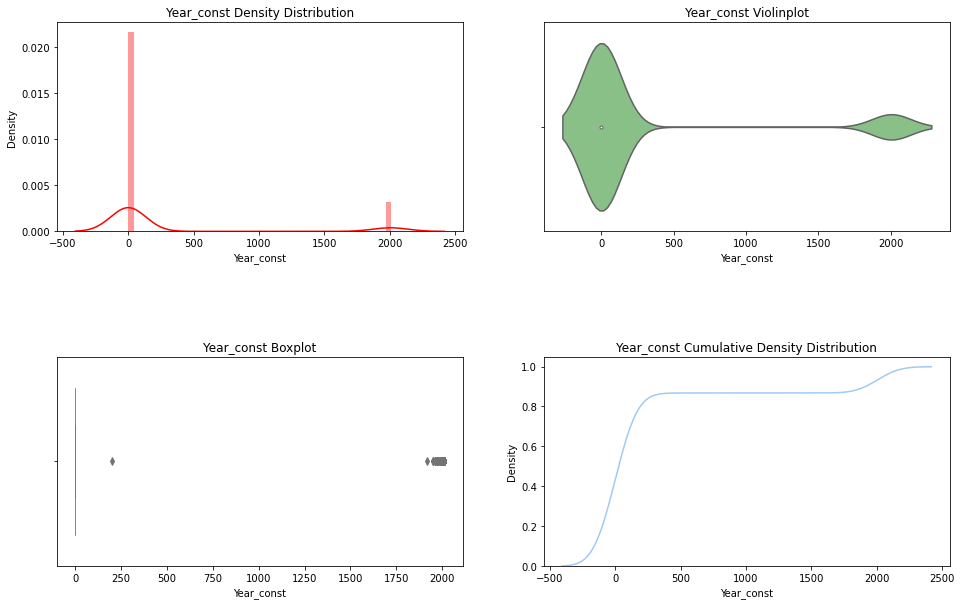

In [ ]:
summary ('Year_const')

Shows that most of the water points constructed were in the 18th centrury which afterwards after 2000 is when it picked and more water points were constructed 

In [ ]:
#sns.violinplot(x='row_id', y='clean_adm1', data=df)

<AxesSubplot:>

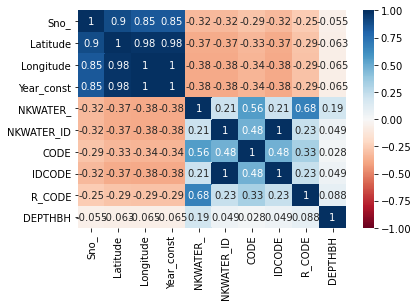

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)